# Charting the Path to Sustainability: Integrating Land Sector Data with SDGs
## Task 2- Attribute-SDGs Mapping for Land Sector Data

### BIOCLIMATIC AND ECOLOGICAL ZONES: KENYA

### Objective
This phase of the project aims at mapping SDGs to Land Sector Data, focusing on Bioclimatic and ecological zones. The prototype will show how ecological and agroecological zones data attributes can be used to support the specific Sustainable Development Goals (SDGs). It will highligh the crucial role that these zones can contribute and support the efforts of International, regional, communities and individuals in achieving sustainable goals. 

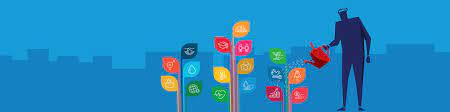

### Sustainable Development Goals 
1. No Poverty
2. Zero Hunger
3. Good Health and Well-being
4. Quality Education
5. Gender Equality
6. Clean Water and Sanitation
7. Affordable and Clean Energy
8. Decent Work and Economic Growth
9. Industry, Innovation, and Infrastructure
10. Reduced Inequality
11. Sustainable Cities and Communities
12. Responsible Consumption and Production
13. Climate Action
14. Life Below Water
15. Life on Land
16. Peace and Justice Strong Institutions
17. Partnerships to achieve the Goal

#### Loading Libraries 

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading Kenya Administrative Data

<AxesSubplot:>

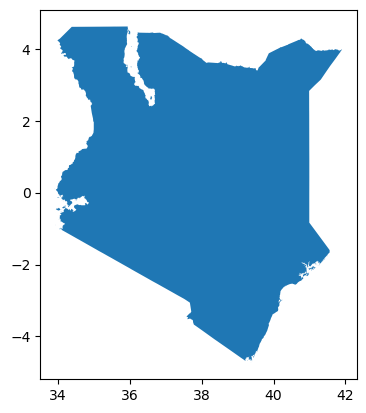

In [2]:
kenya_adm=gpd.read_file(r"C:\Users\Samoei\Downloads\KEN_AL2_Kenya.json")
kenya_adm
kenya_adm.plot()

# BIOCLIMATIC AND ECOLOGICAL ZONES

Different regions on earth experience different climatic conditions, have different life forms and different environments. Animals and Plants have preference on areas they can live in. This is typically called natural selection. These preferred zones by animals and plants are called bioclimatic zones. These zones are classified based on factors such as rainfall, temperatures, altitude and moisture balance. Climates can further be classified based on biological effects of rainfall and temperature. These zones are called Agroecological zones. 

### Ecological Zones

In [3]:
#Loading the data
kenya_ecological=gpd.read_file(r'C:\Users\Samoei\Desktop\git projects\KEN_AL2_Kenya_GEZ.json')
kenya_ecological.head()

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,KEN,,Kenya,Tropical dry forest,13,TAwb,2,"MULTIPOLYGON (((34.76935 -0.29384, 34.76875 -0..."
1,KEN,,Kenya,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((39.59500 -4.06283, 39.59465 -4..."
2,KEN,,Kenya,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((38.45417 -3.34256, 38.41297 -3..."
3,KEN,,Kenya,Tropical rainforest,11,TAr,2,"MULTIPOLYGON (((39.22227 -4.66908, 39.22226 -4..."
4,KEN,,Kenya,Tropical shrubland,14,TBSh,2,"MULTIPOLYGON (((36.41257 -1.41796, 36.38317 -1..."


In [4]:
kenya_ecological["gez_name"].value_counts()

Tropical dry forest         1
Tropical moist forest       1
Tropical mountain system    1
Tropical rainforest         1
Tropical shrubland          1
Water                       1
Name: gez_name, dtype: int64

### Data visualization- Ecological Zones 

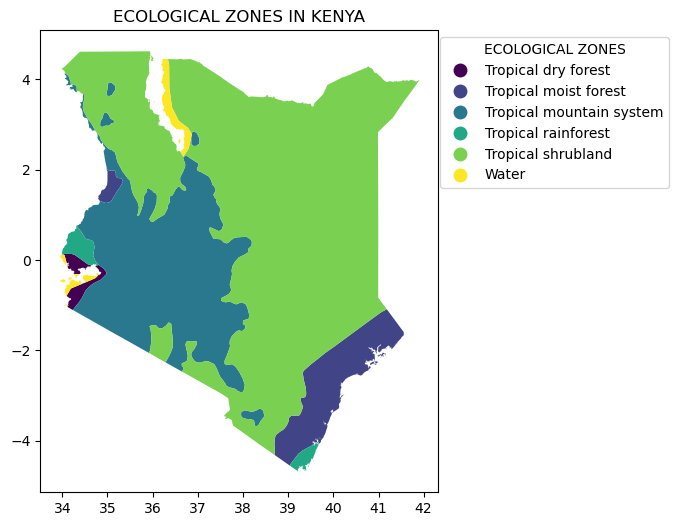

In [6]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the ecological zones
kenya_ecological.plot(column="gez_name", cmap="viridis", ax=ax, legend=True)

plt.title("ECOLOGICAL ZONES IN KENYA")

# Add a legend
legend = ax.get_legend()
legend.set_title("ECOLOGICAL ZONES")
legend.set_bbox_to_anchor((1.6, 1)) 

plt.show()

### Mapping Ecological Zones to SDGs

In [7]:
# Define the mapping function for ecological zones dataframe
def map_ecological_to_sdgs(zone):
    if zone['gez_name']!='Water':
        return "SDG 13, SDG14, SDG 15"
    else:
        return "SDG 6"

### Agroecological Zones

In [8]:
import json
with open(r"C:\Users\Samoei\Desktop\git projects\GlobalAgroEcologicalZones_GAEZ.geojson") as file:
    agroecology = json.load(file)

In [9]:
worldagro_data = gpd.GeoDataFrame.from_features(agroecology['features'])
worldagro_data.head()

,geometry,Value
0,"POLYGON ((-33.50000 83.65000, -33.50000 83.500...",1
1,"POLYGON ((-37.85000 83.60000, -37.85000 83.500...",1
2,"POLYGON ((-32.35000 83.60000, -32.35000 83.500...",1
3,"POLYGON ((-31.25000 83.60000, -31.25000 83.500...",1
4,"POLYGON ((-34.25000 83.60000, -34.25000 83.500...",1


In [10]:
# Check for unique values present in the value column
worldagro_data["Value"].unique()

array([ 1,  2, 18, 14, 11, 12, 13,  5, 10,  9, 17,  8, 16, 15,  4,  6,  7,
        3], dtype=int64)

In [11]:
# Fix the data and replace numbers with acgroecological zones

values = {"1": "Tropical-Arid", "2": "Tropical-Dry Semi-Arid", "3": "Tropical -Moist Semi-Arid", "4": "Tropical-Sub-Humid", "5": "Tropical-Humid", 
          "6": "Tropical-Humid (year round)", "7": "Temperate-Arid", "8": "Temperate-Dry Semi-Arid", "9": "Temperate-Moist Semi-Arid", 
          "10": "Temperate-Sub-Humid", "11": "Temperate-Humid", "12": "Temperate-Humid (year round)", "13": "Boreal-Arid", 
          "14": "Boreal-Dry Semi-Arid", "15": "Boreal-Moist Semi-Arid", "16": "Boreal-Sub-humid", "17": "Boreal-Humid", 
          "18": "Boreal-Humid (year round)"}

In [12]:
# Standardizing the column names
worldagro_data.columns = worldagro_data.columns.str.lower()
# Renaming class name and replacing with values
worldagro_data.value = worldagro_data.value.astype("str").replace(values)
worldagro_data.head(2)

,geometry,value
0,"POLYGON ((-33.50000 83.65000, -33.50000 83.500...",Tropical-Arid
1,"POLYGON ((-37.85000 83.60000, -37.85000 83.500...",Tropical-Arid


In [13]:
# Extract Kenya's agroecological zones from the world dataset
kenyaagro_data = worldagro_data.clip(kenya_adm)
kenyaagro_data = kenyaagro_data .reset_index(drop=True)
kenyaagro_data.head()

,geometry,value
0,"POLYGON ((40.00000 -0.25000, 40.00000 -0.50000...",Tropical-Humid
1,"POLYGON ((40.35000 -0.35000, 40.35000 -0.40000...",Temperate-Dry Semi-Arid
2,"POLYGON ((40.25000 -0.25000, 40.25000 -0.35000...",Temperate-Dry Semi-Arid
3,"POLYGON ((40.95000 -0.35000, 40.85000 -0.35000...",Tropical-Humid
4,"POLYGON ((40.00000 0.25000, 40.00000 0.15000, ...",Temperate-Dry Semi-Arid


In [14]:
kenyaagro_data['value'].unique()

array(['Tropical-Humid', 'Temperate-Dry Semi-Arid',
       'Tropical-Humid (year round)', 'Temperate-Arid', 'Temperate-Humid',
       'Boreal-Arid', 'Tropical-Arid', 'Temperate-Sub-Humid',
       'Temperate-Moist Semi-Arid', 'Boreal-Humid (year round)',
       'Tropical -Moist Semi-Arid', 'Temperate-Humid (year round)',
       'Boreal-Dry Semi-Arid', 'Tropical-Sub-Humid', 'Boreal-Humid'],
      dtype=object)

### Visualizing Agroecological Zones

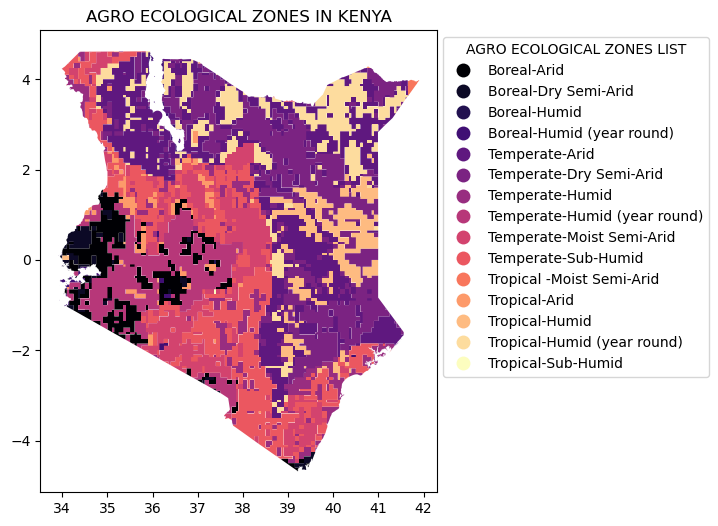

In [15]:
# Creating plot
fig, ax = plt.subplots(figsize=(10, 6))
kenyaagro_data.plot(column="value", cmap="magma", ax=ax, legend=True)
plt.title("AGRO ECOLOGICAL ZONES IN KENYA")

# Adding a legend
legend = ax.get_legend()
legend.set_title("AGRO ECOLOGICAL ZONES LIST")
legend.set_bbox_to_anchor((1.7, 1)) 
plt.show()

### Mapping Agroecological Zones to SDGs

In [16]:
def map_agroeco_to_sdgs(zones):
    if zones["value"] != '':  
        return "SDG 2,SDG 6,SDG 11,SDG 12,SDG 13, SDG 15"
    else:
        return "Not Mapped"

In [17]:
# Apply the mapping function to create a new column "Mapped_SDGs"

kenya_ecological["Mapped_SDGs"] = kenya_ecological.apply(map_ecological_to_sdgs, axis=1)

kenyaagro_data["Mapped_SDGs"] = kenyaagro_data.apply(map_agroeco_to_sdgs, axis=1)


In [18]:
# Save the mapped datasets
kenya_ecological.to_file("Mapped_Ecological_zones.geojson", driver='GeoJSON')
kenyaagro_data.to_file("Mapped_Agroecological_zones.geojson", driver='GeoJSON')


### Testing the Prototypes

In [19]:
kenya_ecological.head()

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry,Mapped_SDGs
0,KEN,,Kenya,Tropical dry forest,13,TAwb,2,"MULTIPOLYGON (((34.76935 -0.29384, 34.76875 -0...","SDG 13, SDG14, SDG 15"
1,KEN,,Kenya,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((39.59500 -4.06283, 39.59465 -4...","SDG 13, SDG14, SDG 15"
2,KEN,,Kenya,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((38.45417 -3.34256, 38.41297 -3...","SDG 13, SDG14, SDG 15"
3,KEN,,Kenya,Tropical rainforest,11,TAr,2,"MULTIPOLYGON (((39.22227 -4.66908, 39.22226 -4...","SDG 13, SDG14, SDG 15"
4,KEN,,Kenya,Tropical shrubland,14,TBSh,2,"MULTIPOLYGON (((36.41257 -1.41796, 36.38317 -1...","SDG 13, SDG14, SDG 15"


In [20]:
kenyaagro_data.head()

,geometry,value,Mapped_SDGs
0,"POLYGON ((40.00000 -0.25000, 40.00000 -0.50000...",Tropical-Humid,"SDG 2,SDG 6,SDG 11,SDG 12,SDG 13, SDG 15"
1,"POLYGON ((40.35000 -0.35000, 40.35000 -0.40000...",Temperate-Dry Semi-Arid,"SDG 2,SDG 6,SDG 11,SDG 12,SDG 13, SDG 15"
2,"POLYGON ((40.25000 -0.25000, 40.25000 -0.35000...",Temperate-Dry Semi-Arid,"SDG 2,SDG 6,SDG 11,SDG 12,SDG 13, SDG 15"
3,"POLYGON ((40.95000 -0.35000, 40.85000 -0.35000...",Tropical-Humid,"SDG 2,SDG 6,SDG 11,SDG 12,SDG 13, SDG 15"
4,"POLYGON ((40.00000 0.25000, 40.00000 0.15000, ...",Temperate-Dry Semi-Arid,"SDG 2,SDG 6,SDG 11,SDG 12,SDG 13, SDG 15"


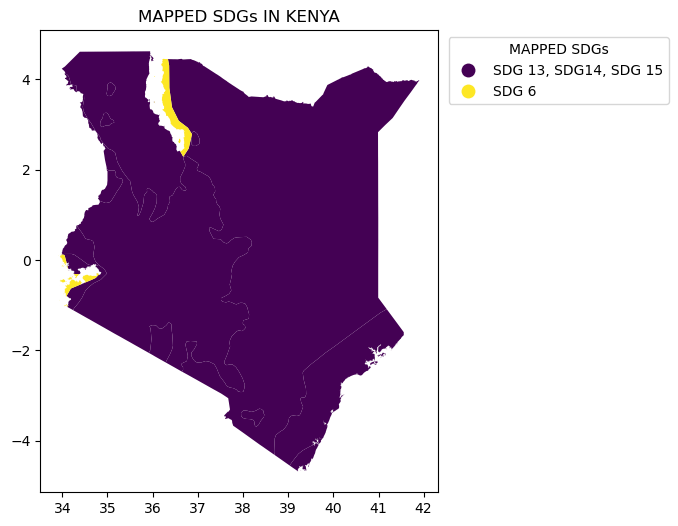

In [27]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the mapped SDGs
kenya_ecological.plot(column="Mapped_SDGs", cmap="viridis", ax=ax, legend=True)

plt.title("MAPPED SDGs IN KENYA")

# Add a legend
legend = ax.get_legend()
legend.set_title("MAPPED SDGs")
legend.set_bbox_to_anchor((1.6, 1)) 

plt.show()

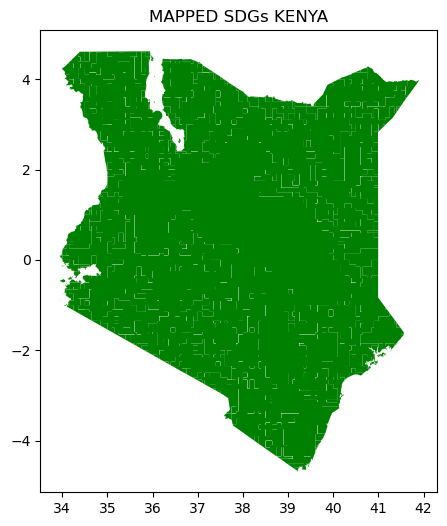

In [28]:
# Creating plot
fig, ax = plt.subplots(figsize=(10, 6))
kenyaagro_data.plot(column="Mapped_SDGs", color="green", ax=ax, legend=True)
plt.title("MAPPED SDGs KENYA")
 
plt.show()
